# **Decision Tree - Practical Implementation**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
# classification dataset
df_clf = sns.load_dataset('iris')

# regression dataset
df_reg = pd.read_csv('/content/housing.csv')

**Label Encoding**

In [3]:
df_clf['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df_clf['species'] = df_clf['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

**Train Test Split**

In [5]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [6]:
# splitting
# classification
X_clf = df_clf.drop('species', axis=1)
y_clf = df_clf[['species']]

# regression
X_reg = df_reg.drop('MEDV', axis=1)
y_reg = df_reg[['MEDV']]

In [7]:
# classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.33, random_state=42)

# regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.33, random_state=42)

## **Decision Tree Implementation**

### **Decision Tree Classifier**

In [10]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [11]:
clf_tree = DecisionTreeClassifier()

In [50]:
parameters = {
    'criterion': ['entropy', 'gini', 'logg_loss'],
    'max_depth': [1, 2, 3, 4, 5],
    'splitter': ['random', 'best'],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf_tree_cv = GridSearchCV(clf_tree, param_grid=parameters, scoring='accuracy', cv=5)
clf_tree_cv.fit(X_train_clf, y_train_clf)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'logg_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [51]:
# best parameters
clf_tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [52]:
# best score
clf_tree_cv.best_score_

0.93

**Testing**

In [18]:
# importing metrics
from sklearn.metrics import accuracy_score, classification_report

In [53]:
clf_y_pred = clf_tree_cv.predict(X_test_clf)

In [54]:
# accuracy score
accuracy_score(clf_y_pred, y_test_clf)

0.98

In [55]:
# classification report
print(classification_report(clf_y_pred, y_test_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### **Decision Tree Regressor**

In [22]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

**Training**

In [23]:
reg_tree = DecisionTreeRegressor()

In [58]:
parameters = {
    'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
reg_tree_cv = GridSearchCV(reg_tree, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)
reg_tree_cv.fit(X_train_reg, y_train_reg)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [59]:
# best parameters
reg_tree_cv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [66]:
# best score
reg_tree_cv.best_score_

-18.826171312554877

**Testing**

In [27]:
# importing metrics
from sklearn.metrics import r2_score

In [67]:
reg_y_pred = reg_tree_cv.predict(X_test_reg)

In [68]:
# r2 score
r2_score(reg_y_pred, y_test_reg)

0.7539936889911574

<Axes: ylabel='Density'>

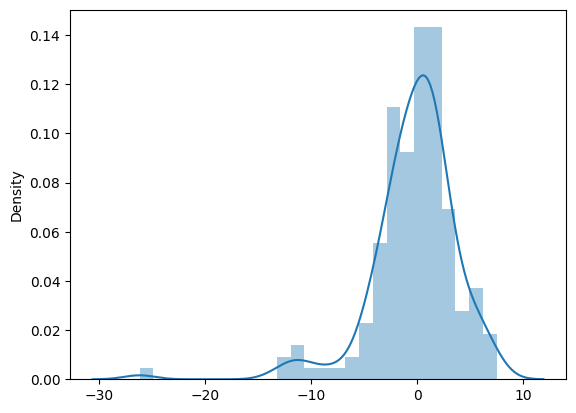

In [69]:
sns.distplot(reg_y_pred.reshape(len(reg_y_pred), 1) - y_test_reg)